In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [4]:
df = pd.read_csv("cancer_classification.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

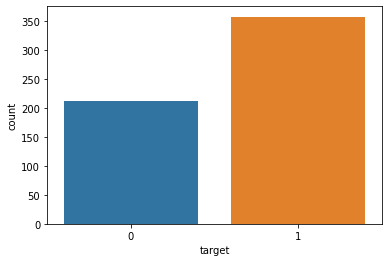

In [8]:
sns.countplot(x="target", data=df)

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [14]:
# Now before moving with NN,we will scale our data--

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest) # fit does the caklc for us,and transformhelpstoapply those transformations



In [15]:
#Step1 -: initialising the model
ann = Sequential()

#step2-: add the layers...

# 30 because at first no. of cols I have are 30
ann.add(Dense(units=30, activation="relu"))
# 
ann.add(Dense(units=15, activation="relu"))
ann.add(Dense(units=1, activation="sigmoid"))

#step3 -: establish the connection between the layers
ann.compile(optimizer="adam", loss="binary_crossentropy")

#step4-: train the model
ann.fit(xtrain, ytrain, epochs=600, validation_data=(xtest, ytest))


Epoch 1/600
15/15 [==============================] - 4s 13ms/step - loss: 0.6226 - val_loss: 0.5128
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4243 - val_loss: 0.3805
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3032 - val_loss: 0.2900
Epoch 4/600
15/15 [==============================] - 0s 4ms/step - loss: 0.2234 - val_loss: 0.2288
Epoch 5/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1736 - val_loss: 0.1901
Epoch 6/600
15/15 [==============================] - 0s 15ms/step - loss: 0.1414 - val_loss: 0.1664
Epoch 7/600
15/15 [==============================] - 0s 10ms/step - loss: 0.1201 - val_loss: 0.1477
Epoch 8/600
15/15 [==============================] - 0s 4ms/step - loss: 0.1045 - val_loss: 0.1342
Epoch 9/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0936 - val_loss: 0.1259
Epoch 10/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0850 - val_loss: 0.1171
Epoch 

In [16]:
ann.history.history

{'loss': [0.6225557327270508,
  0.4243448078632355,
  0.30319884419441223,
  0.22340847551822662,
  0.17364652454853058,
  0.14137817919254303,
  0.12013240158557892,
  0.10452958196401596,
  0.09362521022558212,
  0.08500030636787415,
  0.07882120460271835,
  0.0733586996793747,
  0.06897297501564026,
  0.06485839188098907,
  0.06130527704954147,
  0.05840418115258217,
  0.05572763830423355,
  0.05301395431160927,
  0.05097611993551254,
  0.04876723140478134,
  0.04683913663029671,
  0.044661011546850204,
  0.04294069856405258,
  0.041535213589668274,
  0.03998193144798279,
  0.03767611086368561,
  0.036483217030763626,
  0.03532516956329346,
  0.03398679196834564,
  0.032293934375047684,
  0.03142668679356575,
  0.02991166152060032,
  0.029069550335407257,
  0.027881549671292305,
  0.027211152017116547,
  0.026134680956602097,
  0.025228355079889297,
  0.024242516607046127,
  0.023530293256044388,
  0.022906463593244553,
  0.021724512800574303,
  0.0211263969540596,
  0.0203261841088

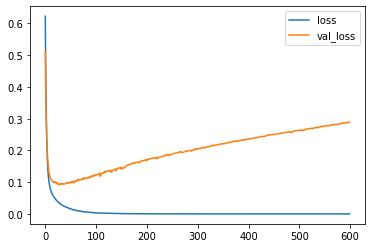

In [17]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [18]:
#low training error -> low bias
#high test error    -> high variance
#Overfitting

In [19]:
ann = Sequential()
ann.add(Dense(units=30, activation="relu"))
ann.add(Dense(units=15, activation="relu"))
ann.add(Dense(units=1, activation="sigmoid"))
ann.compile(optimizer="adam", loss="binary_crossentropy")

In [20]:
'''
the following techniques to prevent Overfitting in neural networks:

Dropout
Early Stopping
Weight Decay
'''

from tensorflow.keras.callbacks import EarlyStopping

In [21]:
# this is like teeling.. as u get the min validation ,  inform me..
earlystop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [22]:
ann.fit(xtrain, ytrain, epochs=600, validation_data=(xtest, ytest), callbacks=[earlystop])

Epoch 1/600
15/15 [==============================] - 1s 13ms/step - loss: 0.7885 - val_loss: 0.6309
Epoch 2/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5139 - val_loss: 0.4761
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3678 - val_loss: 0.3836
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2878 - val_loss: 0.3207
Epoch 5/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2320 - val_loss: 0.2769
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.1905 - val_loss: 0.2400
Epoch 7/600
15/15 [==============================] - 0s 6ms/step - loss: 0.1578 - val_loss: 0.2092
Epoch 8/600
15/15 [==============================] - 0s 8ms/step - loss: 0.1318 - val_loss: 0.1843
Epoch 9/600
15/15 [==============================] - 0s 10ms/step - loss: 0.1121 - val_loss: 0.1631
Epoch 10/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0970 - val_loss: 0.1468
Epoch 1

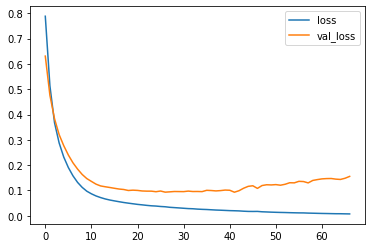

In [23]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [24]:
from tensorflow.keras.layers import Dropout

In [25]:
ann = Sequential()

ann.add(Dense(units=30, activation="relu"))
ann.add(Dropout(rate=0.5)) #Drop 50% neurons

ann.add(Dense(units=15, activation="relu"))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation="sigmoid"))

ann.compile(optimizer="adam", loss="binary_crossentropy")

In [26]:
ann.fit(xtrain, ytrain, epochs=600, validation_data=(xtest, ytest), callbacks=[earlystop])

Epoch 1/600
15/15 [==============================] - 1s 14ms/step - loss: 0.8898 - val_loss: 0.6150
Epoch 2/600
15/15 [==============================] - 0s 7ms/step - loss: 0.6646 - val_loss: 0.4901
Epoch 3/600
15/15 [==============================] - 0s 7ms/step - loss: 0.5050 - val_loss: 0.4094
Epoch 4/600
15/15 [==============================] - 0s 8ms/step - loss: 0.4793 - val_loss: 0.3446
Epoch 5/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4129 - val_loss: 0.2906
Epoch 6/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3630 - val_loss: 0.2476
Epoch 7/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3197 - val_loss: 0.2154
Epoch 8/600
15/15 [==============================] - 0s 8ms/step - loss: 0.2711 - val_loss: 0.1928
Epoch 9/600
15/15 [==============================] - 0s 7ms/step - loss: 0.2689 - val_loss: 0.1768
Epoch 10/600
15/15 [==============================] - 0s 8ms/step - loss: 0.2183 - val_loss: 0.1629
Epoch 11

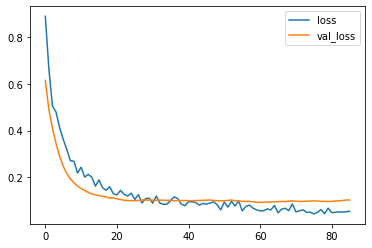

In [27]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [28]:
ypred = ann.predict(xtest)

4/4 [==============================] - 0s 3ms/step


In [29]:
ypred = ypred>0.5

In [30]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

